In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from path import Path

In [2]:
file_path = Path("../Resources/sanFranCrime.csv")
sf_crime_df = pd.read_csv(file_path)
sf_crime_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [3]:
sf_crime_df.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

In [4]:
# Generate our categorical variable list
sf_crime_cat = sf_crime_df.dtypes[sf_crime_df.dtypes == "object"].index.tolist()

In [5]:
# Check the number of unique values in each column
sf_crime_df[sf_crime_cat].nunique()

Category         39
Descript        726
DayOfWeek         7
Date            366
Time           1439
PdDistrict       10
Resolution       14
Address       16130
Location      19386
dtype: int64

In [6]:
# Print out the Category value counts
category_counts = sf_crime_df.Category.value_counts()
category_counts

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

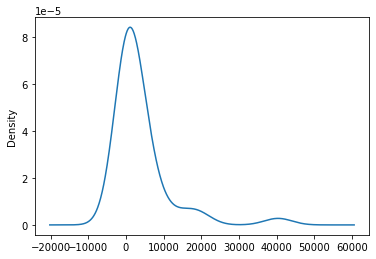

In [7]:
# Visualize the value counts
category_counts.plot.density()

In [8]:
# Determine which values to replace
replace_category = list(category_counts[category_counts < 1000].index)

# Replace in DataFrame
for category in replace_category:
    sf_crime_df.Category = sf_crime_df.Category.replace(category,"Other")


# Check to make sure binning was successful
sf_crime_df.Category.value_counts()

LARCENY/THEFT      40409
OTHER OFFENSES     19599
NON-CRIMINAL       17866
ASSAULT            13577
VANDALISM           8589
Other               6717
VEHICLE THEFT       6419
WARRANTS            5914
BURGLARY            5802
SUSPICIOUS OCC      5782
MISSING PERSON      4338
DRUG/NARCOTIC       4243
ROBBERY             3299
FRAUD               2635
SECONDARY CODES     1841
TRESPASS            1812
WEAPON LAWS         1658
Name: Category, dtype: int64

In [9]:
# We will drop columns that are not necessary for our analysis. 
sf_crime_df = sf_crime_df.drop(["IncidntNum","Descript", "Date", "Resolution", "Address", "Location", "X", "Y", "PdId"], axis=1)
sf_crime_df.head()

,Category,DayOfWeek,Time,PdDistrict
0,WEAPON LAWS,Friday,11:00,SOUTHERN
1,WEAPON LAWS,Friday,11:00,SOUTHERN
2,WARRANTS,Monday,14:59,BAYVIEW
3,NON-CRIMINAL,Tuesday,23:50,TENDERLOIN
4,NON-CRIMINAL,Friday,00:30,MISSION


In [10]:
# We will also drop any null values.  
sf_crime_df = sf_crime_df.dropna()

In [11]:
# Create new list categorical variable list.
sf_crime_cat2 = sf_crime_df.dtypes[sf_crime_df.dtypes == "object"].index.tolist()

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(sf_crime_df[sf_crime_cat2]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(sf_crime_cat2)
encode_df.head()

,Category_ASSAULT,Category_BURGLARY,Category_DRUG/NARCOTIC,Category_FRAUD,Category_LARCENY/THEFT,Category_MISSING PERSON,Category_NON-CRIMINAL,Category_OTHER OFFENSES,Category_Other,Category_ROBBERY,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
sf_crime_df = sf_crime_df.merge(encode_df,left_index=True, right_index=True)
sf_crime_df = sf_crime_df.drop(sf_crime_cat2,1)
sf_crime_df.head()

,Category_ASSAULT,Category_BURGLARY,Category_DRUG/NARCOTIC,Category_FRAUD,Category_LARCENY/THEFT,Category_MISSING PERSON,Category_NON-CRIMINAL,Category_OTHER OFFENSES,Category_Other,Category_ROBBERY,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
outcome = sf_crime_df.iloc[:, 0:16]
print(outcome)

        Category_ASSAULT  Category_BURGLARY  Category_DRUG/NARCOTIC  \
0                    0.0                0.0                     0.0   
1                    0.0                0.0                     0.0   
2                    0.0                0.0                     0.0   
3                    0.0                0.0                     0.0   
4                    0.0                0.0                     0.0   
...                  ...                ...                     ...   
150494               1.0                0.0                     0.0   
150495               0.0                0.0                     0.0   
150496               0.0                0.0                     0.0   
150497               0.0                0.0                     0.0   
150498               0.0                0.0                     0.0   

        Category_FRAUD  Category_LARCENY/THEFT  Category_MISSING PERSON  \
0                  0.0                     0.0                      0.0 

In [15]:
# Remove Category outcome target from features data
y = outcome.values
X = sf_crime_df.drop(sf_crime_df.iloc[:, 0:16], axis=1).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 11664     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 11,695
Trainable params: 11,695
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

Epoch 1/100


ValueError: in user code:

    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\lrinc\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 16) and (None, 1) are incompatible
